In [234]:
import warnings
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import numpy as np
import re
import string
import csv
df = pd.read_csv('apporach01-clean data.csv')
df=df.drop("Unnamed: 0", axis=1) 
df.head()
rest_list = list(df.Restaurant.unique())
df.loc[df.Category.str.contains('dessert'),'Category'] = "sides"
df.Restaurant.unique()

array(['Popeyes', 'Mcdonalds', 'Burger-king', 'chick-fil-a',
       'jack-in-the-box', 'Wendys', 'Subway', 'KFC', 'Arbys',
       'dunkin-donuts', 'Papa-Johns', 'pizza-hut', 'Taco-Bell',
       'panda-express', 'hardees', 'five-guys'], dtype=object)

In [235]:
df.head()

,Restaurant,Category,Types,Items,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,entrees,chicken,Wing,210,13,8,610.0,0.0
1,Popeyes,entrees,chicken,Leg,160,14,5,460.0,0.0
2,Popeyes,entrees,chicken,Thigh,280,14,7,640.0,0.0
3,Popeyes,entrees,chicken,Breast,440,35,16,1330.0,0.0
4,Popeyes,entrees,chicken,Wing,210,13,8,410.0,1.0


In [271]:
df_mealavg

,Restaurant,Category,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,meal,859.88,23.42,114.13,1714.49,57.22
0,Mcdonalds,meal,976.37,33.53,125.79,1384.14,71.57
0,Burger-king,meal,1124.48,34.97,136.13,1693.15,77.87
0,chick-fil-a,meal,903.69,37.91,118.17,1619.07,64.77
0,jack-in-the-box,meal,1151.34,34.61,144.12,1600.02,83.52
0,Wendys,meal,867.18,33.22,104.12,1338.44,54.53
0,Subway,meal,654.34,32.89,94.34,1390.37,45.17
0,KFC,meal,768.8,28.63,103.35,1512.45,69.11
0,Arbys,meal,1364.88,45.42,140.41,2164.71,78.51
0,dunkin-donuts,meal,821.74,18.41,119.49,1119.36,65.32


In [237]:
rest_list = list(df.Restaurant.unique())

frames = []
meal_avg = []
for i in rest_list:    
    if len(df[df.Restaurant==i].Category.unique())==3:
        sub_df = df[df.Restaurant==i]

        a = pd.DataFrame(round(sub_df[sub_df.Category=='entrees'].mean(),2)).transpose()
        #a.insert([0,1],['Restaurant','Category'],[i,'entrees'])
        a.insert(0,'Restaurant',i)
        a.insert(1,'Category','entrees')
        
        b = pd.DataFrame(round(sub_df[sub_df.Category=='beverages'].mean(),2)).transpose()
        b.insert(0,'Restaurant',i)
        b.insert(1,'Category','beverages')
        
        c = pd.DataFrame(round(sub_df[sub_df.Category=='sides'].mean(),2)).transpose()
        c.insert(0,'Restaurant',i)
        c.insert(1,'Category','sides')
        
        
        meal = pd.DataFrame(pd.concat([a,b,c]).sum()).transpose()
        meal.Restaurant[0] = i
        meal.Category[0] = 'meal'
        
        meal_avg = meal_avg +[meal]
        
        frames = frames + [a,b,c]
        
    elif len(df[df.Restaurant==i].Category.unique())==2:
        sub_df = df[df.Restaurant==i]

        a = pd.DataFrame(round(sub_df[sub_df.Category=='entrees'].mean(),2)).transpose()
        #a.insert([0,1],['Restaurant','Category'],[i,'entrees'])
        a.insert(0,'Restaurant',i)
        a.insert(1,'Category','entrees')
        
        #using average to make up the missing value
        b = pd.DataFrame(round(df[df.Category=='beverages'].mean(),2)).transpose()
        b.insert(0,'Restaurant',i)
        b.insert(1,'Category','beverages')
        
        c = pd.DataFrame(round(sub_df[sub_df.Category=='sides'].mean(),2)).transpose()
        c.insert(0,'Restaurant',i)
        c.insert(1,'Category','sides')
        
        
        meal = pd.DataFrame(pd.concat([a,b,c]).sum()).transpose()
        meal.Restaurant[0] = i
        meal.Category[0] = 'meal'
        
        meal_avg = meal_avg +[meal]
        
        frames = frames + [a,b,c]
       
    else:
        sub_df = df[df.Restaurant==i]

        a = pd.DataFrame(round(sub_df[sub_df.Category=='entrees'].mean(),2)).transpose()
        #a.insert([0,1],['Restaurant','Category'],[i,'entrees'])
        a.insert(0,'Restaurant',i)
        a.insert(1,'Category','entrees')
        
        #using average to make up the missing value        
        b = pd.DataFrame(round(df[df.Category=='beverages'].mean(),2)).transpose()
        b.insert(0,'Restaurant',i)
        b.insert(1,'Category','beverages')
        
        #using average to make up the missing value
        c = pd.DataFrame(round(df[df.Category=='sides'].mean(),2)).transpose()
        c.insert(0,'Restaurant',i)
        c.insert(1,'Category','sides')
        
        
        meal = pd.DataFrame(pd.concat([a,b,c]).sum()).transpose()
        meal.Restaurant[0] = i
        meal.Category[0] = 'meal'
        
        meal_avg = meal_avg +[meal]
        
        frames = frames + [a,b,c]



df_avg = pd.concat(frames)
df_mealavg = pd.concat(meal_avg)

In [238]:
df_avg

,Restaurant,Category,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,entrees,363.03,17.06,28.03,880.91,2.12
0,Popeyes,beverages,177.92,0.00,48.17,69.08,48.17
0,Popeyes,sides,318.93,6.36,37.93,764.50,6.93
0,Mcdonalds,entrees,494.72,24.16,43.78,1046.12,8.95
0,Mcdonalds,beverages,137.75,1.26,31.65,59.16,30.68
0,Mcdonalds,sides,343.90,8.11,50.36,278.86,31.94
0,Burger-king,entrees,540.52,23.96,38.52,1081.82,7.56
0,Burger-king,beverages,292.93,2.84,63.89,136.16,59.00
0,Burger-king,sides,291.03,8.17,33.72,475.17,11.31
0,chick-fil-a,entrees,415.45,22.64,41.64,1035.68,21.59


In [239]:
df_mealavg

,Restaurant,Category,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,meal,859.88,23.42,114.13,1714.49,57.22
0,Mcdonalds,meal,976.37,33.53,125.79,1384.14,71.57
0,Burger-king,meal,1124.48,34.97,136.13,1693.15,77.87
0,chick-fil-a,meal,903.69,37.91,118.17,1619.07,64.77
0,jack-in-the-box,meal,1151.34,34.61,144.12,1600.02,83.52
0,Wendys,meal,867.18,33.22,104.12,1338.44,54.53
0,Subway,meal,654.34,32.89,94.34,1390.37,45.17
0,KFC,meal,768.8,28.63,103.35,1512.45,69.11
0,Arbys,meal,1364.88,45.42,140.41,2164.71,78.51
0,dunkin-donuts,meal,821.74,18.41,119.49,1119.36,65.32


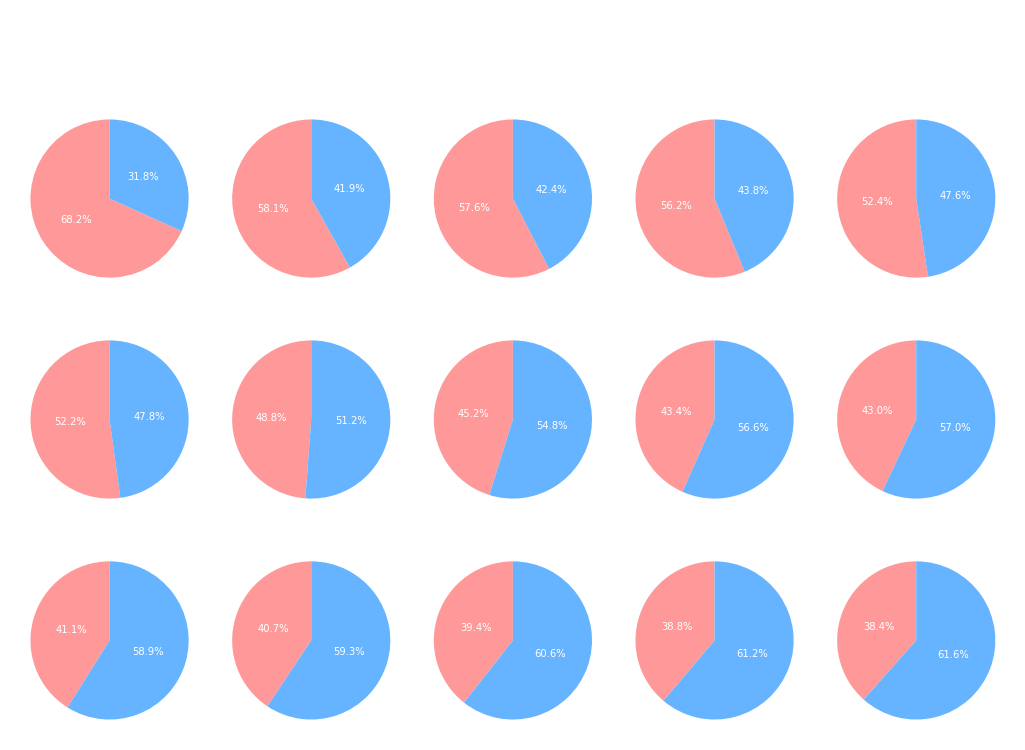

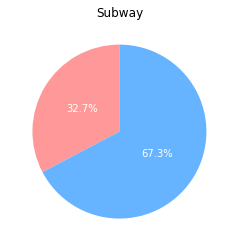

In [257]:
df_mealavg2=df_mealavg.copy()
df_mealavg2 = df_mealavg2.sort_values(by=['Calories'],ascending=False)
list_rest = df_mealavg2.Restaurant.unique()

import matplotlib.pyplot as plt

fig, axes= plt.subplots(3, 5,figsize=(18,12))
for i, ax in enumerate(axes.flatten()):
    i = list_rest[i]
    df_temp = df_mealavg2[df_mealavg2.Restaurant== i]
    labels = ['One-meal Calories', 'Remaining Calories Needed']
    sizes = [float(df_temp.Calories), 2000-float(df_temp.Calories)]
    colors = [ '#ff9999','#66b3ff']    
    _, texts, autotexts = ax.pie(sizes,colors=colors, startangle=90,autopct='%1.1f%%', pctdistance=0.5)
    ax.set_title(i,fontsize=14, color = 'white') #,color = 'white'
    #ax.axis('equal')
    for autotext in autotexts:
        autotext.set_color('white')

fig.suptitle('Calories per Meal of each Restaurant',fontsize=24, color = 'white')#, color = 'white'
#fig.legend(labels=labels,loc="upper right")
texts[0].set_fontsize(14)
plt.subplots_adjust(hspace=0.05,wspace = 0.02)
plt.show()



df_temp = df_mealavg2[df_mealavg2.Restaurant== list_rest[-1]]
labels = ['One-meal Calories', 'Remaining Calories Needed']
sizes = [float(df_temp.Calories), 2000-float(df_temp.Calories)]
colors = [ '#ff9999','#66b3ff']    
_, _, autotexts = plt.pie(sizes,colors=colors, startangle=90,autopct='%1.1f%%', pctdistance=0.5)
for autotext in autotexts:
    autotext.set_color('white')
plt.title(list_rest[-1])   
plt.show()




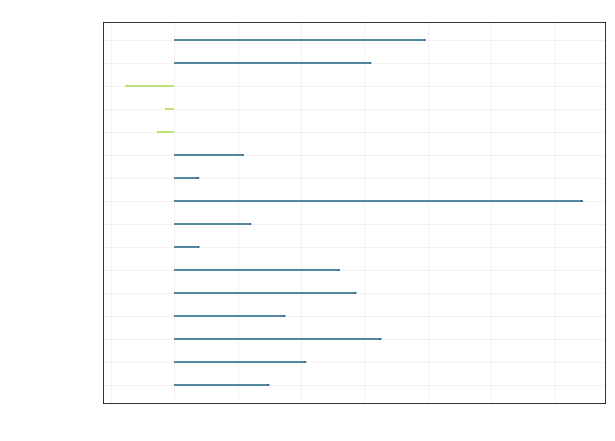

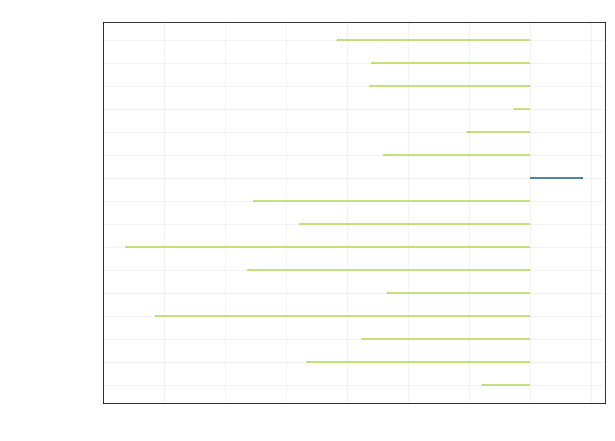

In [278]:
## reference: https://www.nal.usda.gov/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein
## reference: https://health.gov/dietaryguidelines/2015/guidelines/appendix-7/

ref_protein = 50  #https://www.accessdata.fda.gov/scripts/InteractiveNutritionFactsLabel/factsheets/Protein.pdf
ref_carb = 300 #https://www.fda.gov/food/nutrition-education-resources-materials/how-understand-and-use-nutrition-facts-label
rest = list(df_mealavg.Restaurant.unique())
diff_protein = {}
diff_carb = {}
for i in rest:
    df_temp = df_mealavg[df_mealavg.Restaurant== i ]
    prop = df_temp.Calories / 2000
    Protein = df_temp['Protein (g)']
    Carbs = df_temp['Carbs (g)']

    #ref_protein * prop  = how much Protein suppose to be intook
    #Protein = Protein actually intook
    diff_p = ref_protein * prop - Protein
    diff_protein.update({i:diff_p})
    
    diff_c= ref_carb * prop - Carbs
    diff_carb.update({i:diff_c})
    
    
diff_carb_val = [float(i) for i in list(diff_carb.values())]
diff_protein_val = [float(i) for i in list(diff_protein.values())]



import seaborn as sns
my_color=np.where(np.array(diff_carb_val)>=0, '#1b6285','#b0db51' )
fig, ax = plt.subplots(1,1,figsize=(9,7))
plt.hlines(y=list(diff_carb.keys()), xmin=0, xmax=np.array(diff_carb_val), color=my_color)
plt.scatter( np.array(diff_carb_val),list(diff_carb.keys()),color=my_color, s=1, alpha=1)

plt.grid(alpha=0.2)
# Add title and axis names
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.title("Carbohydrate difference", loc='left', color = 'white')
plt.xlabel('Difference = Recommended Carbohydrate Intake - Protein Carbohydrate per Meal').set_color("white")
plt.ylabel('Restaurant').set_color("white")
plt.show()


my_color=np.where(np.array(diff_protein_val)>=0,  '#1b6285','#b0db51' )
fig, ax = plt.subplots(1,1,figsize=(9,7))
plt.hlines(y=list(diff_protein.keys()), xmin=0, xmax=np.array(diff_protein_val), color=my_color)
plt.scatter( np.array(diff_protein_val),list(diff_protein.keys()),color=my_color, s=1, alpha=1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.grid(alpha=0.2)
# Add title and axis names
plt.title("Protein difference", loc='left', color = 'white')
plt.xlabel('Difference = Recommended Protein Intake - Protein contained per meal').set_color("white")
plt.ylabel('Restaurant').set_color("white")
plt.show()



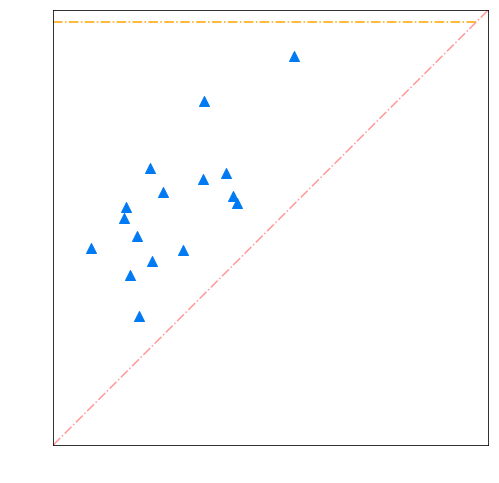

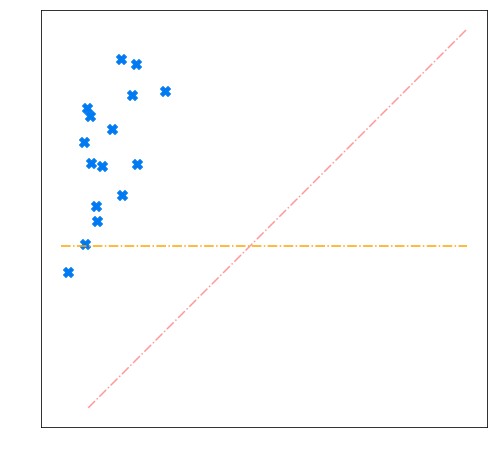

In [279]:
rest = list(df_mealavg.Restaurant.unique())

ref_Sodium = 2300
ref_Sugar = 50

prec_Sodium = []
Sodium = []

prec_Sugar = []
Sugar = []
for i in rest:
    df_temp = df_mealavg[df_mealavg.Restaurant== i ]
    prop = df_temp.Calories / 2000
    Sodium.append(float(df_temp['Sodium (mg)']))
    Sugar.append(float(df_temp['Sugars (g)']))
    
    prec_Sodium.append(float(ref_Sodium * prop))
    prec_Sugar.append(float(ref_Sugar * prop))
    
    
# create scatter plot for Recommended Maximun Sugar Intake VS Sugar Per Meal 
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(prec_Sodium, Sodium,  marker='^',s=100,c='#007af2')
# set line for Recommended Maximun Sugar Intake = Sugar Per Meal 
ax.plot( [600,2350],[600,2350] ,'-.',color='#ff9999')
ax.set_xlim(600,  2350)
ax.set_ylim(600,  2350)
ax.set_aspect('equal')
ax.hlines(y=2300, xmin=600, xmax=2300,color='orange',linestyle='-.')      
ax.set_xlabel('Recommended Maximun Sodium Intakes ').set_color("white")
ax.set_ylabel('Sodium Per Meal ').set_color("white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()


# create scatter plot for Recommended Maximun Sugar Intake VS Sugar Per Meal 
fig, ax = plt.subplots(figsize=(8, 8))
# set line for Recommended Maximun Sugar Intake = Sugar Per Meal
plt.scatter(prec_Sugar, Sugar,  marker='X',s=100,c='#007af2')
ax.plot([20,90],[20,90]  ,'-.',color='#ff9999')
ax.set_aspect('equal')
# set line for Maximun Sugar Intake
ax.hlines(y=50, xmin=15, xmax=90,color='orange',linestyle='-.')      
plt.xlabel('Recommended Maximun Sugar Intakes ').set_color("white")
plt.ylabel('Sugar Per Meal ').set_color("white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
#ax.spines['bottom'].set_color('red')
#ax.spines['top'].set_color('red')
plt.show()


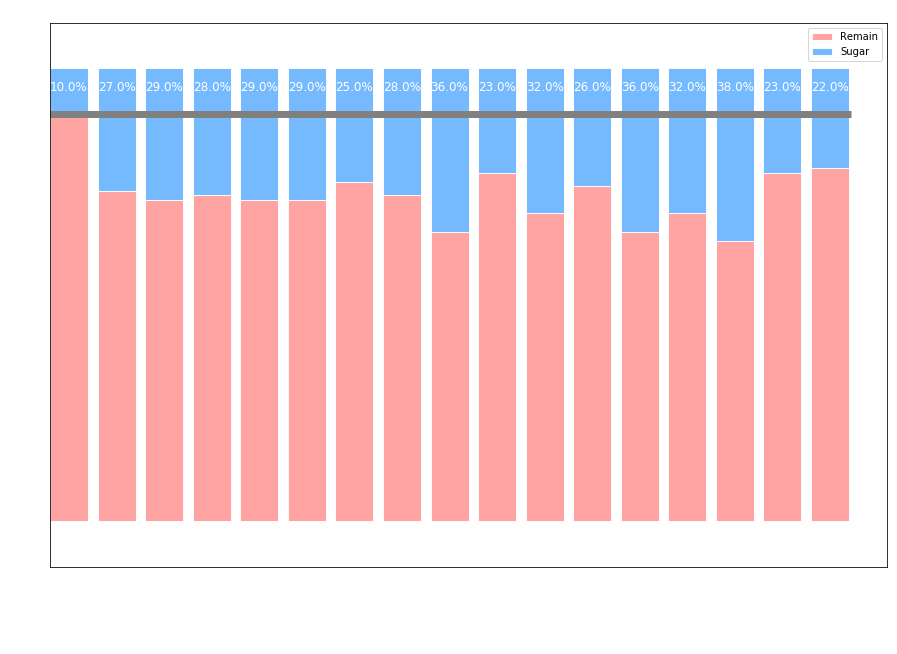

In [270]:
rest = list(df_mealavg.Restaurant.unique())

Sugar_list= [10]
remain_list = [90]
sugar_prec = [10/100]
for i in rest:
    
    df_temp = df_mealavg[df_mealavg.Restaurant== i ]
    prop = df_temp.Calories / 2000
    calories = float(df_temp['Calories'])
    sugar = float(df_temp['Sugars (g)'])
    Sugar_list.append(round(sugar*4/calories,2)*100)
    sugar_prec.append(round(sugar*4/calories,2))
    remain_list.append(100-round(sugar*4/calories,2)*100)


Sugar_list = np.array(Sugar_list)
remain_list = np.array(remain_list)
rest.insert(0,'Reference')
f, ax = plt.subplots(1, figsize=(15,10))
bar_width = 0.8

# positions of the left bar-boundaries
bar_l = [i for i in range(len(rest))] 
# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

ax.bar(bar_l,remain_list,                     label='Remain',  alpha=0.9, color='#ff9999', width=bar_width,edgecolor='white')
ax.bar(bar_l,Sugar_list, bottom=remain_list,  label='Sugar',  alpha=0.9, color='#66b3ff', width=bar_width,edgecolor='white')
ax.set_ylabel("Percentage",fontsize=13).set_color("white")
ax.hlines(y=90, xmin=(min(tick_pos)-bar_width), xmax=(max(tick_pos)+bar_width)-0.75,color='gray',alpha=1,linewidth=7.0)      
ax.set_xlabel("")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.xticks(bar_l, rest, rotation=45,fontsize=12)
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)
plt.title("Sugar Content", loc='left', color = 'white')

Sugar_list = list(Sugar_list)
ind = 0
for i in range(17):
    ax.text(x=tick_pos[i]-0.8,y=95,s=str(round(Sugar_list[i],2))+'%',fontsize=12).set_color("white")

plt.legend()
plt.show()
#for i in ax.patches:
#   

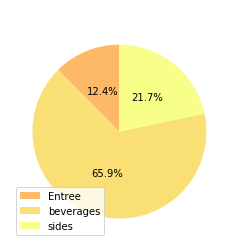

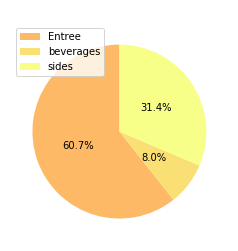

In [276]:
sugar_entree = float (list(df[df.Category == 'entrees'].mean())[4])
Sodium_entreee =float( list(df[df.Category == 'entrees'].mean())[3])
sugar_b =float( list(df[df.Category == 'beverages'].mean())[4])
Sodium_b = float(list(df[df.Category == 'beverages'].mean())[3])
sugar_sides = float(list(df[df.Category == 'sides'].mean())[4])
Sodium_sides = float(list(df[df.Category == 'sides'].mean())[3])

labels = ['Entree', 'beverages','sides']
sizes = [sugar_entree,sugar_b,sugar_sides ]
colors = ['#fdb965','#f9df74','#f8ff89']  

plt.pie(sizes,colors=colors, startangle=90,autopct='%1.1f%%', pctdistance=0.5)
#for autotext in autotexts:
#    autotext.set_color('white')
plt.legend(labels = labels)
plt.title('Sugar',loc='center', color = 'white')   
plt.show()


labels = ['Entree', 'beverages','sides']
sizes = [Sodium_entreee,Sodium_b,Sodium_sides ]
colors = ['#fdb965','#f9df74','#f8ff89']  

plt.pie(sizes,colors=colors, startangle=90,autopct='%1.1f%%', pctdistance=0.5)
#for autotext in autotexts:
#    autotext.set_color('white')
plt.legend(labels = labels)
plt.title('Sodium',loc='center',color = 'white')   
plt.show()


In [156]:
### reference data
#Carbs = 2000*0.60/4
#Protein = 2000*0.30/4
#sugar = 2000*0.1/4
##Sodium/sugar - upper intake
## https://www.nal.usda.gov/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein
## https://www.accessdata.fda.gov/scripts/interactivenutritionfactslabel/factsheets/sugars.pdf
#df_reference = pd.DataFrame({'Restaurant':['FDA','FDA','FDA'], 
                        #'Category':['FDA','FDA','FDA'], 
                        #'Types':['FDA','FDA','FDA'],
                        #'Items':['FDA','FDA','FDA'], 
                        #'Calories':[2000,2000,2000],   # accept
                        #'Protein (g)':[52,2000*0.1/4,2000*0.35/4], 
                        #'Carbs (g)':[130,2000*0.45/4,2000*0.65/4], 
                        #'Sodium (mg)':[0,0,2300],
                        #'Sugars (g)':[0,0,2000*0.1/4 ]}, index =['Recommended Dietary Allowance',
                                                                        #'Tolerable upper level','Tolerable lower level']) 


In [157]:
df_reference

,Restaurant,Category,Types,Items,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
Recommended Dietary Allowance,FDA,FDA,FDA,FDA,2000,52.0,130.0,0,0.0
Tolerable upper level,FDA,FDA,FDA,FDA,2000,50.0,225.0,0,0.0
Tolerable lower level,FDA,FDA,FDA,FDA,2000,175.0,325.0,2300,50.0


In [67]:
#df_avg.to_csv("apporach01-Average nutrition fact.csv")   #export to csv 
#df_mealavg.to_csv("apporach01-Average meal.csv")  
#df_reference.to_csv("apporach01-reference data.csv")

In [280]:
df_avg



,Restaurant,Category,Calories,Protein (g),Carbs (g),Sodium (mg),Sugars (g)
0,Popeyes,entrees,363.03,17.06,28.03,880.91,2.12
0,Popeyes,beverages,177.92,0.00,48.17,69.08,48.17
0,Popeyes,sides,318.93,6.36,37.93,764.50,6.93
0,Mcdonalds,entrees,494.72,24.16,43.78,1046.12,8.95
0,Mcdonalds,beverages,137.75,1.26,31.65,59.16,30.68
0,Mcdonalds,sides,343.90,8.11,50.36,278.86,31.94
0,Burger-king,entrees,540.52,23.96,38.52,1081.82,7.56
0,Burger-king,beverages,292.93,2.84,63.89,136.16,59.00
0,Burger-king,sides,291.03,8.17,33.72,475.17,11.31
0,chick-fil-a,entrees,415.45,22.64,41.64,1035.68,21.59
